In [2]:
#Importance Sampling Method

import numpy as np
from random import random
from scipy.integrate import quad

def f(x):
    '''
    function that I want to integrate
    '''
    return 1/np.sqrt(x)/(np.exp(x)+1)

def w(x):
    '''
    weight function
    '''
    return 1/np.sqrt(x)

def p(x):
    '''
    probability function
    '''
    #since g(x) = integral of p(x)g(x)
    #g = integral 1/2sqrt(x) 
    #  = sqrt(x) from 0 to F
    #g = F(sqrt(g))
    #square both sides
    #F = g^2
    return x**2
    
def IM_1(N):
    '''
    function to calculate the value of an integral using the
    Importance Sampling Method
    '''
    a = quad(w, 0, 1)[0] #integral of weighted function
    I = 0
    for i in range(N):
        '''
        loop to go through random number points
        '''
        x = random()
        y = p(x)
        I += f(y)/w(y) #the weighted average
    return I/N*a

In [7]:
IM_1(1000000)

0.8390925554722154

In [8]:
#Lets check how accurate it is using scipy integrate
quad(f,0,1)[0]

0.8389329600133838

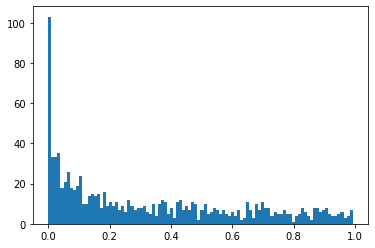

'\nsince this plot looks like w we know we chose the right \nF inverse function\n'

In [3]:
import matplotlib.pyplot as plt

res = []
w = lambda x: 1/np.sqrt(x)
for i in range(1000):
    x = random()
    res.append(x*x)
plt.hist(res, bins=100)
plt.plot(w(x), 'r')
plt.show()

'''
since this plot looks like w we know we chose the right 
F inverse function
'''

In [24]:
def f2(x):
    '''
    function that I want to integrate
    '''
    return 1/x / (np.exp(x)+1)

def w2(x):
    '''
    weight function
    '''
    return 1/x

def p2(x):
    '''
    probability function
    '''
    #since g(x) = integral of p(x)g(x)
    #g = integral (0)* x**-1
    #using table of integrals = (0)*ln|x| from 0 to F
    #g = (0)*F(ln(g))
    #F = (0)*e^g
    #I used 10**-100 to simulate zero 
    #since we cant actually calculate with zero
    return (1e-100)*np.exp(x)

def IM_2(N):
    '''
    function to calculate the value of an integral using the
    Importance Sampling Method
    '''
    g2 = quad(w2, 0, 1)[0] #integral of weighted function
    I = 0
    for i in range(N):
        '''
        loop to go through random number points
        '''
        x = random()
        y = p2(x)
        I += f2(y)/w2(y) #the weighted average
    return I/N*g2

In [25]:
IM_2(10000)

<ipython-input-24-bac8f90e77d6>:30: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  g2 = quad(w2, 0, 1)[0] #integral of weighted function


20.838420337694046

In [12]:
#use scipy integrate function to check accuracy
quad(f2,0,1)[0]

<ipython-input-12-7007f79e50d1>:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad(f2,0,1)[0]


20.594976039904015

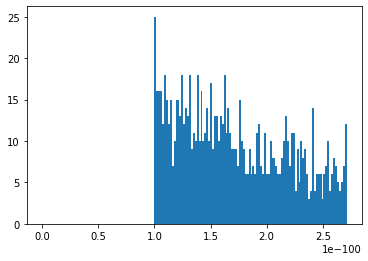

In [4]:
res2 = []
w3 = lambda x: 1/x
for i in range(1000):
    x = random()
    res2.append((1e-100)*np.exp(x))
plt.hist(res2, bins=100)
plt.plot(w3(x), 'r')
plt.show()
'''
this plot looks similar to 1/x
'''